In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
uber_aug14 = pd.read_csv("../data/uber/uber-trip-data/uber-raw-data-aug14.csv")
uber_aug14.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [3]:
group = uber_aug14.groupby("Date/Time")

group.count()

,Lat,Lon,Base
Date/Time,,,
8/1/2014 0:00:00,23,23,23
8/1/2014 0:01:00,15,15,15
8/1/2014 0:02:00,11,11,11
8/1/2014 0:03:00,19,19,19
8/1/2014 0:04:00,13,13,13
...,...,...,...
8/9/2014 9:55:00,10,10,10
8/9/2014 9:56:00,12,12,12
8/9/2014 9:57:00,12,12,12


In [4]:
uber_aug14["Count"] = 1
uber_aug14

,Date/Time,Lat,Lon,Base,Count
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512,1
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512,1
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512,1
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512,1
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512,1
...,...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764,1
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764,1
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764,1
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764,1


In [5]:
uber_aug14['dates'] = pd.to_datetime(uber_aug14["Date/Time"])

In [6]:
uber_aug14 = uber_aug14[["Count", "dates"]]
uber_aug14

,Count,dates
0,1,2014-08-01 00:03:00
1,1,2014-08-01 00:09:00
2,1,2014-08-01 00:12:00
3,1,2014-08-01 00:12:00
4,1,2014-08-01 00:12:00
...,...,...
829270,1,2014-08-31 23:55:00
829271,1,2014-08-31 23:55:00
829272,1,2014-08-31 23:55:00
829273,1,2014-08-31 23:59:00


In [7]:
groupedby_day = uber_aug14.groupby(pd.Grouper(key='dates', axis=0, 
                      freq='D')).sum()

In [8]:
groupedby_day.head()

,Count
dates,
2014-08-01,32353
2014-08-02,28678
2014-08-03,23146
2014-08-04,24952
2014-08-05,28094


In [42]:
groupedby_day["date_"] = groupedby_day.index.to_series()
groupedby_day.head()

,Count,date_
dates,,
2014-08-01,32353,2014-08-01
2014-08-02,28678,2014-08-02
2014-08-03,23146,2014-08-03
2014-08-04,24952,2014-08-04
2014-08-05,28094,2014-08-05


In [43]:
groupedby_day["DayOfWeek"] = groupedby_day.date_.dt.weekday

In [44]:
groupedby_day["Weekend"] = groupedby_day.DayOfWeek >= 5

<AxesSubplot:xlabel='date_', ylabel='Count'>

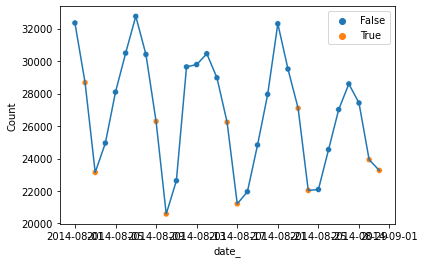

In [45]:
sns.scatterplot(y = groupedby_day["Count"], x = groupedby_day["date_"], hue = groupedby_day["Weekend"])
sns.lineplot(y = groupedby_day["Count"], x = groupedby_day["date_"])

<AxesSubplot:xlabel='date_', ylabel='Count'>

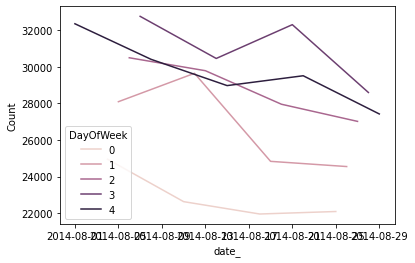

In [84]:
weekdays = groupedby_day[groupedby_day["DayOfWeek"] < 5]
sns.lineplot(y = weekdays["Count"], x = weekdays["date_"], hue=weekdays["DayOfWeek"])

<AxesSubplot:xlabel='date_', ylabel='Count'>

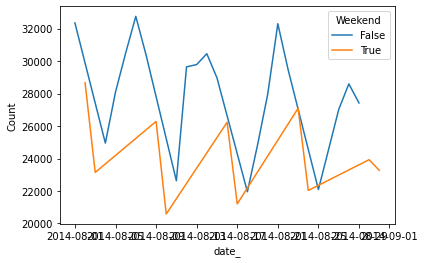

In [46]:
sns.lineplot(y = groupedby_day["Count"], x = groupedby_day["date_"], hue = groupedby_day["Weekend"])

In [72]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(groupedby_day.Count.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.456658
p-value: 0.554833


In [73]:
weekends = groupedby_day[groupedby_day["DayOfWeek"] >= 5]
result = adfuller(weekends.Count.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.375288
p-value: 0.000000


In [75]:
weekdays = groupedby_day[groupedby_day["DayOfWeek"] < 5]
result = adfuller(weekdays.Count.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.396795
p-value: 0.910632
